## 第4章 Matplotlibでグラフを 描画しよう

### 4-7: 箱ひげ図

In [1]:
# リスト4.7.1：箱ひげ図の描画
import matplotlib.pyplot as plt

plt.style.use("ggplot")
x = [1, 2, 3, 3, 11, 20]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(x)
plt.show()

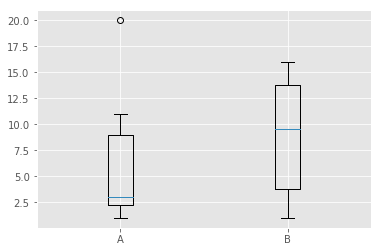

In [2]:
# リスト4.7.2：複数の箱ひげ図の描画
# 複数のリストをリストにセット
x = [[1, 2, 3, 3, 11, 20], [1, 2, 9, 10, 15, 16]]
labels = ["A", "B"]
fig = plt.figure()
ax = fig.add_subplot(111)
# データとラベルを指定
ax.boxplot(x, labels=labels)
plt.show()

In [3]:
# リスト4.7.3：anime_master.csvファイルの読み込み
import os
import pandas as pd

base_url = (
    "https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/"
)
anime_master_csv = os.path.join(base_url, "anime_master.csv")
df = pd.read_csv(anime_master_csv, index_col="anime_id")
df.head(3)

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


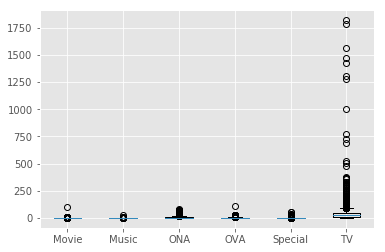

In [4]:
# リスト4.7.4：配給種別ごとのエピソード数を可視化
labels = []
types_list = []
# 配給種別ごとのエピソード数の情報をリスト化
for label, df_per_type in df.groupby("type"):
    labels.append(label)
    types_list.append(df_per_type["episodes"].tolist())
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(types_list, labels=labels)
plt.show()

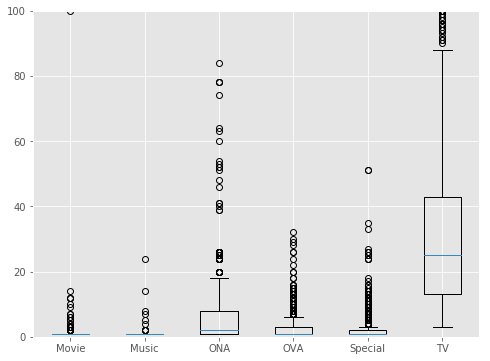

In [5]:
# リスト4.7.5：描画範囲を限定した箱ひげ図
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.boxplot(types_list, labels=labels)
# Y軸の描画範囲を0から100までに限定
ax.set_ylim(0, 100)
plt.show()

In [6]:
# リスト4.7.6：四分位点の値をdescribe()で確認
df["episodes"][df["type"] == "TV"].describe().round(1)

count    3330.0
mean       37.5
std        83.3
min         3.0
25%        13.0
50%        25.0
75%        43.0
max      1818.0
Name: episodes, dtype: float64

In [7]:
# リスト4.7.7：データセットの作成
import numpy as np

np.random.seed(3)
dataset = [np.random.normal(20 + mu, 5, 1000) for mu in range(1, 5)]

In [8]:
# リスト4.7.8：書式辞書の作成
# はずれ値の書式辞書
flierprop = {
    "color": "#EC407A",
    "marker": "o",
    "markerfacecolor": "#2196F3",
    "markeredgecolor": "white",
    "markersize": 5,
    "linestyle": "None",
    "linewidth": 0.1,
}
# 箱の書式辞書
boxprop = {"color": "#2196F3", "facecolor": "#BBDEFB", "linewidth": 1, "linestyle": "-"}
# ヒゲの書式辞書
whiskerprop = {"color": "#2196F3", "linewidth": 1, "linestyle": "--"}
# ヒゲ末端キャップの書式辞書
capprop = {"color": "#2196F3", "linewidth": 1, "linestyle": ":"}
# 中央値の書式辞書
medianprop = {"color": "#2196F3", "linewidth": 2, "linestyle": "-"}
# 平均値の書式辞書
meanprop = {
    "color": "#2196F3",
    "marker": "^",
    "markerfacecolor": "#2196F3",
    "markeredgecolor": "white",
    "markersize": 10,
    "linewidth": 1,
    "linestyle": "",
}

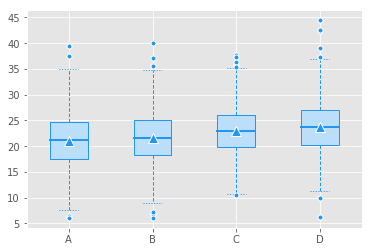

In [9]:
# リスト4.7.9：箱ひげ図の書式一括設定
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(
    dataset,
    patch_artist="Patch",  # 書式を設定する場合は 「Patch」 を選択
    labels=["A", "B", "C", "D"],  # 項目ラベル
    showmeans=True,  # 平均値の描画
    flierprops=flierprop,  # はずれ値の書式設定
    boxprops=boxprop,  # ボックスの書式設定
    whiskerprops=whiskerprop,  # ヒゲの書式設定
    capprops=capprop,  # ヒゲのキャップの書式設定
    medianprops=medianprop,  # 中央値の書式設定
    meanprops=meanprop,  # 平均値の書式設定
)
plt.show()

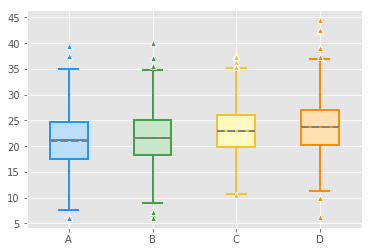

In [10]:
# リスト4.7.10：ボックスごとに書式を設定する
# 図の描画
fig = plt.figure()
ax = fig.add_subplot(111)
bp = ax.boxplot(
    dataset,
    patch_artist="Patch",
    labels=["A", "B", "C", "D"],
    meanline=True,
    showmeans=True,
)
# カラーセット
colors1 = ["#2196F3", "#43A047", "#FBC02D", "#FB8C00"]
colors2 = ["#BBDEFB", "#C8E6C9", "#FFF9C4", "#FFE0B2"]
# 上下に分かれた要素に設定するための用の数列
n = [0, 0, 1, 1, 2, 2, 3, 3]
# 書式設定
# ボックスとはずれ値、 中央値の書式設定
for params in zip(bp["boxes"], bp["fliers"], bp["medians"], colors1, colors2):
    bpb, bpf, med, color1, color2 = params
    # ボックスの書式設定
    bpb.set_color(color1)
    bpb.set_facecolor(color2)
    bpb.set_linewidth(2)
    # 外れ値の書式設定
    bpf.set(marker="^", color=color2)
    bpf.set_markeredgecolor("white")
    bpf.set_markerfacecolor(color1)
    # 中央値の書式設定
    med.set_color(color1)
    med.set_linewidth(2)
# ヒゲとヒゲの末端キャップの書式設定
for bpc, bpw, m in zip(bp["caps"], bp["whiskers"], n):
    bpc.set_color(colors1[m])
    bpc.set_linewidth(2)
    bpw.set_color(colors1[m])
    bpw.set_linewidth(2)
# 平均値の書式設定
for mean, color2 in zip(bp["means"], colors2):
    mean.set_color("grey")
    mean.set_linewidth(2)
    mean.set_linestyle("--")
plt.show()